## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import (
    Dense,
    LSTM,
    Dropout,
    Lambda,
    Flatten,
    TimeDistributed
)
from tensorflow.keras.callbacks import EarlyStopping
from tensorboard.plugins.hparams import api as hp
from tensorflow.keras.optimizers import Adam, SGD

## Get train and test sets

In [2]:
train_set = pd.read_csv('train.csv')
test_set = pd.read_csv('test.csv')
train_set['date'] = pd.to_datetime(train_set['date'], format="%Y-%m-%d")

In [3]:
train_set.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


## Insert the notion of weekdays  and days od the month

In [4]:
train_set['year']    =  train_set['date'].dt.year
train_set['month']   =  train_set['date'].dt.month
train_set['day']     =  train_set['date'].dt.dayofyear
train_set['weekday'] =  train_set['date'].dt.weekday
train_set['weekend'] =  train_set['weekday'] > 4

## Verifing the correlation between weekend and sales

Text(0, 0.5, 'Mean of sales value')

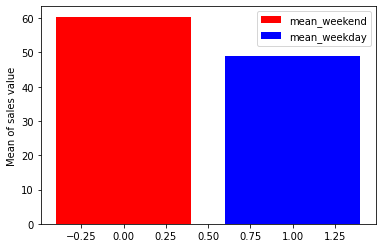

In [5]:
mean_weekend = train_set[(train_set['weekend'] == 1)]['sales'].mean()
mean_weekday = train_set[(train_set['weekend'] == 0)]['sales'].mean()
plt.bar([0],[mean_weekend], color='r', label='mean_weekend')
plt.bar([1],[mean_weekday], color='b', label='mean_weekday')
plt.legend()
plt.ylabel('Mean of sales value')

### This shows that the sales value increases in the weekends and decreces in the weekdays

## Get the series of one store and one item

In [6]:
item_set = train_set[(train_set['item'] == 1) & (train_set['store'] == 1)]

In [7]:
item_train_set = item_set[(item_set['date'] < "2016-12-31")]
item_test_set  = item_set[(item_set['date'] > "2016-12-31")]

In [8]:
item_train_set.head()

,date,store,item,sales,year,month,day,weekday,weekend
0,2013-01-01,1,1,13,2013,1,1,1,False
1,2013-01-02,1,1,11,2013,1,2,2,False
2,2013-01-03,1,1,14,2013,1,3,3,False
3,2013-01-04,1,1,13,2013,1,4,4,False
4,2013-01-05,1,1,10,2013,1,5,5,True


In [9]:
item_test_set.head()

,date,store,item,sales,year,month,day,weekday,weekend
1461,2017-01-01,1,1,19,2017,1,1,6,True
1462,2017-01-02,1,1,15,2017,1,2,0,False
1463,2017-01-03,1,1,10,2017,1,3,1,False
1464,2017-01-04,1,1,16,2017,1,4,2,False
1465,2017-01-05,1,1,14,2017,1,5,3,False
